In [1]:
# https://github.com/pyproj4/pyproj
# Propdo.ai  - data driven real estate startup

#inspire with:
https://datadashboard.health.gov.il/COVID-19/general

In [2]:
import pandas as pd
import sqlite3

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # -darkgrid

In [4]:
# con = sqlite3.connect("nadlan_backup1.db")
con = sqlite3.connect("resources/nadlan.db")

In [5]:
df = pd.read_sql("select * from trans",con=con)
df['tarIska'] = pd.to_datetime(df['tarIska'], format='%Y%m%d')
df = df[df['tarIska'] >= pd.to_datetime('2010-01-01')]
df = df.set_index('tarIska')
df['helekNimkar'] = df['helekNimkar'].astype(float)
print(len(df))
df = df[df['helekNimkar'] == 1.0]

502696


In [6]:
df.head()

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,tifkudBnyn,tifkudYchida,shumaHalakim,mofaGush,tava,mahutZchut,helekNimkar,corX,corY,insertionDate
tarIska,,,,,,,,,,,,,,,,,,,,,
2022-12-14,90 - מק-באר שבע,038089-0101-037-00,באר שבע,התלמוד,60,--,9,520000,520000,71,...,מגורים,דירה בבית קומות,1 / 1 ליחידה בשלמותה,2,0,בעלות,1.0,179527,575374,2022-12-18 01:47:28.892752
2022-12-14,29 - מק-מרכז,006386-0170-032-00,פתח תקווה,רוטשילד,162,--,32,2270000,2270000,77,...,מגורים,מחברה לפרטי,1 / 1 ליחידה בשלמותה,0,0,בעלות,1.0,189252,665041,2022-12-18 01:47:28.892752
2022-12-14,30 - מק-ירושלים,030695-0022-081-00,ירושלים,פרימו לוי,1,--,10,2500000,2500000,68,...,מגורים,דירה בבית קומות,1 / 1 ליחידה בשלמותה,0,0,בעלות,1.0,221360,628727,2022-12-18 01:47:28.892752
2022-12-14,50 - מק-תל אביב,007151-0238-007-00,בת ים,ההגנה,32,--,0,1985000,1985000,90,...,מגורים,מחברה לפרטי,1 / 1 ליחידה בשלמותה,1,0,בעלות,1.0,176834,658905,2022-12-18 01:47:28.892752
2022-12-14,65 - מק-חדרה,010570-0048-004-00,חדרה,שיבת ציון,43,--,0,3030000,3030000,148,...,מגורים,דירה בבית קומות,1 / 1 ליחידה בשלמותה,1,0,בעלות,1.0,189047,704898,2022-12-18 01:47:28.892752


In [7]:
# pd.options.display.float_format = '{:,.2f}'.format
# df['helekNimkar'].value_counts().head(10).plot(kind="bar")
len(df)

414069

In [8]:
df.columns

Index(['ezor', 'gush', 'yeshuv', 'rechov', 'bayit', 'knisa', 'dira',
       'mcirMozhar', 'mcirMorach', 'shetachBruto', 'shetachNeto', 'shnatBniya',
       'misHadarim', 'lblKoma', 'misKomot', 'dirotBnyn', 'hanaya', 'malit',
       'sugIska', 'tifkudBnyn', 'tifkudYchida', 'shumaHalakim', 'mofaGush',
       'tava', 'mahutZchut', 'helekNimkar', 'corX', 'corY', 'insertionDate'],
      dtype='object')

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
df_g = df.groupby(['yeshuv', 'misHadarim', 'shnatBniya']).agg(mean=('mcirMozhar','mean'), std=('mcirMozhar','std'), size=('yeshuv', 'size'))
# {'mcirMozhar': {'mean_1': 'mean', 'std_1': 'std'}, 'yeshuv':'size'}
# f.agg(x=('A', max), y=('B', 'min'), z=('C', np.mean))
df_g

mean  std  size
yeshuv misHadarim shnatBniya                        
--     2.00       1970         369,999.00  NaN     1
       4.00       2017       1,000,000.00  NaN     1
                  2018       2,030,000.00  NaN     1
                  2019       1,288,998.00  NaN     1
       5.00       2019       2,500,000.00  NaN     1
...                                   ...  ...   ...
תקוע   12.00      2009       2,200,000.00  NaN     1
תרום   5.00       2019       3,350,000.00  NaN     1
       6.00       2016       3,400,000.00  NaN     1
       7.00       2014       2,626,000.00  NaN     1
       8.00       1991       2,850,000.00  NaN     1

[28774 rows x 3 columns]

In [11]:
df[df['tifkudYchida'] == "מחברה לפרטי"]['shnatBniya'].value_counts().sort_index()

1920       2
1930       6
1940       5
1950      11
1960      40
1970     148
1980       1
1982       1
1987       2
1990       1
1992       3
1994       4
1995       1
1996       2
1998       2
1999       1
2000       3
2004       3
2006       1
2007       6
2010       1
2011       2
2012       2
2013      13
2014       4
2015      26
2016      74
2017     274
2018     496
2019    1042
2020    2176
2021    4920
2022    7263
2023    1886
2024    1175
2025     965
2026     132
2027      11
2028      40
2033       1
Name: shnatBniya, dtype: int64

In [12]:
df[df['tifkudYchida'] != "מחברה לפרטי"]['shnatBniya'].value_counts().sort_index()[-60:]

/var/folders/gm/ry_d6f0138g91qlw7ngrf2400000gn/T/ipykernel_12744/200501593.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df[df['tifkudYchida'] != "מחברה לפרטי"]['shnatBniya'].value_counts().sort_index()[-60:]


1974       35
1975       64
1976       23
1977       24
1978       26
1979       43
1980    11498
1981     1508
1982     2215
1983     1787
1984     1650
1985     2956
1986     1416
1987     1357
1988     1517
1989     1454
1990     8323
1991     2840
1992     3989
1993     3785
1994     3291
1995     5700
1996     4184
1997     4028
1998     4449
1999     3975
2000     8646
2001     2862
2002     3123
2003     2903
2004     2968
2005     3447
2006     2652
2007     2796
2008     3318
2009     3156
2010     5269
2011     3388
2012     4675
2013     5543
2014     6002
2015     7922
2016     8872
2017    15143
2018    27516
2019    32960
2020    27622
2021    22766
2022    12631
2023     5025
2024     2917
2025     1893
2026      224
2027      271
2028       58
2029        3
2030       12
2031       13
2032        2
2033        1
Name: shnatBniya, dtype: int64

In [13]:
df['tifkudYchida'].value_counts()

דירה בבית קומות       353120
מחברה לפרטי            20746
קוטג דו-משפחתי         11614
קוטג חד-משפחתי         10469
דירת גן                 9489
מפרטי לפרטי             2685
דירת גג )פנטהאוז(       2394
בית בודד                2088
מחברה לחברה              515
דירה במלון דירות         314
קוטג טורי                307
דירת דופלקס              272
מפרטי לחברה               54
בבנין מעורב מגורים         2
Name: tifkudYchida, dtype: int64

In [14]:
pd.to_datetime(df['shnatBniya']).dt.year

tarIska
2022-12-14    1970
2022-12-14    1970
2022-12-14    1970
2022-12-14    1970
2022-12-14    1970
              ... 
2023-01-15    1970
2023-01-15    1970
2023-01-15    1970
2023-01-15    1970
2023-01-15    1970
Name: shnatBniya, Length: 414069, dtype: int64

In [15]:
df['shnatBniya']

tarIska
2022-12-14    1960
2022-12-14    2025
2022-12-14    2009
2022-12-14    2016
2022-12-14    1950
              ... 
2023-01-15    2025
2023-01-15    2025
2023-01-15    2025
2023-01-15    2023
2023-01-15    2023
Name: shnatBniya, Length: 414069, dtype: int64

In [16]:
(df.index.year - df['shnatBniya']).value_counts()

 0      69392
 1      35350
 2      17155
-1      16231
 51     13674
        ...  
 93         2
 76         1
 87         1
 117        1
 96         1
Length: 126, dtype: int64

In [17]:
# df['newOrUsed'] = df['tifkudYchida'].apply(lambda x: "new" if x == "מחברה לפרטי" else "used")
# df['newOrUsed'] = df['shnatBniya'].apply(lambda x: "new" if x >= 2020 else "used")
df['year_sold_built_diff'] = df.index.year - df['shnatBniya']
df['newOrUsed'] = df['year_sold_built_diff'].apply(lambda x: "new" if x <= 0 else "used")

<AxesSubplot: xlabel='tarIska'>

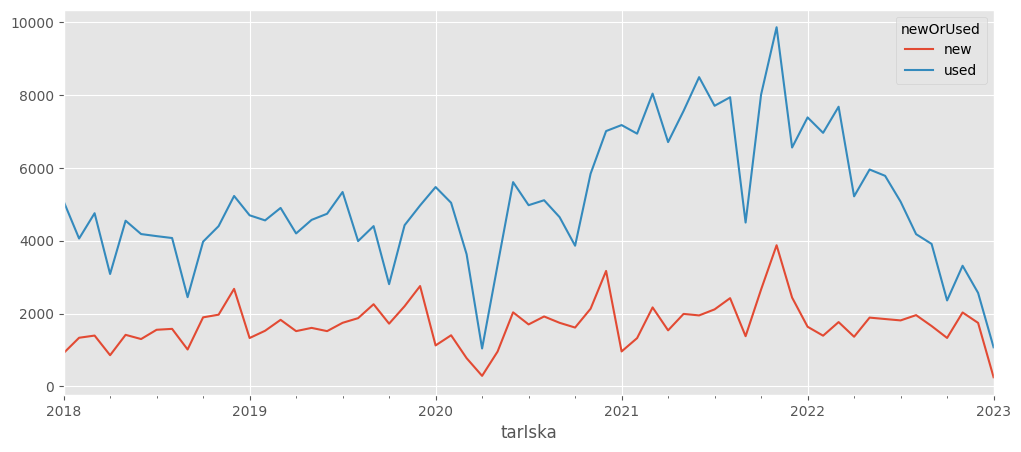

In [26]:
df.resample('M')['newOrUsed'].value_counts().unstack().plot(figsize=(12,5)) # .apply(lambda x: "new" if x == "מחברה לפרטי" else "used")

In [19]:
limit_cities = 10
yeshuv_lst = df['yeshuv'].value_counts()[:limit_cities].index.tolist()
cond_yeshuv_most = df['yeshuv'].isin(yeshuv_lst)
cond_full_sale = df['helekNimkar'] == 1

In [20]:
yeshuv_lst

['ירושלים',
 'באר שבע',
 'חיפה',
 'אשקלון',
 'תל אביב -יפו',
 'נתניה',
 'פתח תקווה',
 'ראשון לציון',
 'אשדוד',
 'בית שמש']

In [21]:
def plot_colorize_pct(df, reverse=True, pct=True):
    # https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red
    from  matplotlib.colors import LinearSegmentedColormap
    c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
    if reverse:
        c = c[::-1]
    v = [0,.1,.4,.5,.6,.9,1.]
    l = list(zip(v,c))
    cmap=LinearSegmentedColormap.from_list('rg',l, N=256)
    if pct:
        return df.style.background_gradient(cmap,axis=None, vmin=-0.5, vmax=0.5).format('{:,.2%}')
    else:
        return df.style.background_gradient(cmap,axis=0).format('{:,.0f}')
# cmap=LinearSegmentedColormap.from_list('rg',["darkred", "w", "darkgreen"], N=256) 
print("Number of sales")
dff = df[cond_yeshuv_most & cond_full_sale].groupby(['yeshuv']).resample('Q', convention='end', closed="left").size().T # .pct_change().dropna()
plot_colorize_pct(dff, pct=False)

Number of sales


yeshuv,אשדוד,אשקלון,באר שבע,בית שמש,חיפה,ירושלים,נתניה,פתח תקווה,ראשון לציון,תל אביב -יפו
tarIska,,,,,,,,,,
2018-03-31 00:00:00,500,492,943,362,817,"1,088",558,575,590,642
2018-06-30 00:00:00,451,487,702,229,794,942,412,505,453,644
2018-09-30 00:00:00,434,383,690,209,684,898,370,428,460,545
2018-12-31 00:00:00,564,495,"1,045",396,857,953,477,595,509,712
2019-03-31 00:00:00,537,480,"1,023",563,811,"1,042",478,593,586,744
2019-06-30 00:00:00,511,485,850,403,784,875,422,602,639,828
2019-09-30 00:00:00,515,510,991,623,864,"1,036",519,634,788,809
2019-12-31 00:00:00,504,908,933,834,794,850,577,565,576,772
2020-03-31 00:00:00,512,792,884,479,775,912,522,582,515,848


In [139]:
yeshuv_lst

['ירושלים',
 'באר שבע',
 'חיפה',
 'אשקלון',
 'תל אביב -יפו',
 'נתניה',
 'פתח תקווה',
 'ראשון לציון',
 'אשדוד']

In [27]:
# dff = df.groupby(['most_cities']).resample('Q', convention='end', closed="left").size() # .T.to_frame() # .pct_change().dropna()
# df.resample('Q', convention='end', closed="left").groupby('most_cities').size() # .T.to_frame() # .pct_change().dropna()
# yeshuv_lst = df['yeshuv'].value_counts()[:limit_cities].index.tolist()[:5]
# df['most_cities'] = df['yeshuv'].apply(lambda x: x if x in yeshuv_lst else 'שאר')
# dff = df[cond_yeshuv_most].groupby('yeshuv').resample('Q').size().T[-9:-1] # .pct_change()
# dff = df[cond_yeshuv_most].groupby('yeshuv').resample('Q')['mcirMorach'].mean().to_frame() # .T # [-9:-1].to_frame() # .pct_change()
# dff.columns = [x[::-1] for x in dff.columns]
dff = df[cond_yeshuv_most].groupby(['yeshuv', pd.Grouper(freq='Q')])['mcirMorach'].mean()  # .to_frame()
dff = dff.unstack(level=0)[-5:]
# dff.plot()
plot_colorize_pct(dff, pct=False)

yeshuv,אשדוד,אשקלון,באר שבע,בית שמש,חיפה,ירושלים,נתניה,פתח תקווה,ראשון לציון,תל אביב -יפו
tarIska,,,,,,,,,,
2022-03-31 00:00:00,"2,616,853","1,433,320","1,134,151","1,723,517","1,381,416","2,619,921","2,459,730","2,161,673","2,321,288","4,737,034"
2022-06-30 00:00:00,"1,821,830","1,527,453","1,198,810","1,825,679","1,411,509","2,871,841","2,425,209","2,379,159","2,281,836","4,259,794"
2022-09-30 00:00:00,"1,917,166","1,528,038","1,155,743","1,850,647","1,443,237","2,722,538","2,459,632","2,314,823","2,375,349","4,651,314"
2022-12-31 00:00:00,"1,932,626","1,382,070","1,146,324","2,077,204","1,673,816","2,972,347","2,746,446","2,390,696","2,544,763","4,248,926"
2023-03-31 00:00:00,"2,211,216","1,540,378","1,080,200","1,346,425","1,937,747","2,853,890","2,198,676","2,508,466","2,224,138","3,502,542"


In [28]:
# def groupby_most_and_rest

In [29]:
df['most_cities'].value_counts()

KeyError: 'most_cities'

In [ ]:
dff = df.groupby(['most_cities']).resample('Q', convention='end', closed="left").size().T # .pct_change().dropna().to_frame()
# plot_colorize_pct(dff.reset_index())

In [ ]:
dff.reset_index().T

In [30]:
df[cond_full_sale]

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,shumaHalakim,mofaGush,tava,mahutZchut,helekNimkar,corX,corY,insertionDate,year_sold_built_diff,newOrUsed
tarIska,,,,,,,,,,,,,,,,,,,,,
2022-12-14,90 - מק-באר שבע,038089-0101-037-00,באר שבע,התלמוד,60,--,9,520000,520000,71,...,1 / 1 ליחידה בשלמותה,2,0,בעלות,1.00,179527,575374,2022-12-18 01:47:28.892752,62,used
2022-12-14,29 - מק-מרכז,006386-0170-032-00,פתח תקווה,רוטשילד,162,--,32,2270000,2270000,77,...,1 / 1 ליחידה בשלמותה,0,0,בעלות,1.00,189252,665041,2022-12-18 01:47:28.892752,-3,new
2022-12-14,30 - מק-ירושלים,030695-0022-081-00,ירושלים,פרימו לוי,1,--,10,2500000,2500000,68,...,1 / 1 ליחידה בשלמותה,0,0,בעלות,1.00,221360,628727,2022-12-18 01:47:28.892752,13,used
2022-12-14,50 - מק-תל אביב,007151-0238-007-00,בת ים,ההגנה,32,--,0,1985000,1985000,90,...,1 / 1 ליחידה בשלמותה,1,0,בעלות,1.00,176834,658905,2022-12-18 01:47:28.892752,6,used
2022-12-14,65 - מק-חדרה,010570-0048-004-00,חדרה,שיבת ציון,43,--,0,3030000,3030000,148,...,1 / 1 ליחידה בשלמותה,1,0,בעלות,1.00,189047,704898,2022-12-18 01:47:28.892752,72,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15,29 - מק-מרכז,006203-0138-019-00,רמת גן,סמדר,3,--,1,6672000,6672000,125,...,1 / 1 ליחידה בשלמותה,0,--,בעלות,1.00,182624,666813,2023-02-08 22:01:18.850156,-2,new
2023-01-15,90 - מק-באר שבע,002812-0045-022-00,קריית גת,קריית גת - ללא רחוב,16,--,22,1971000,1971000,122,...,1 / 1 ליחידה בשלמותה,0,0,חכירה ממינהל,1.00,178516,615784,2023-02-08 22:01:18.850156,-2,new
2023-01-15,90 - מק-באר שבע,002812-0044-011-00,קריית גת,קריית גת - ללא רחוב,12,--,11,1995000,1995000,122,...,1 / 1 ליחידה בשלמותה,1,0,חכירה ממינהל,1.00,178516,615784,2023-02-08 22:01:18.850156,-2,new


In [31]:
df[cond_full_sale].groupby(['yeshuv']).size().sort_values(ascending=False)[:10]

yeshuv
ירושלים         22051
באר שבע         20258
חיפה            19212
אשקלון          16963
תל אביב -יפו    16539
נתניה           12596
פתח תקווה       12449
ראשון לציון     12091
אשדוד           11920
בית שמש         11064
dtype: int64

In [32]:
df[cond_yeshuv_most & cond_full_sale].groupby(['yeshuv']).resample('Q', convention='end', closed="left").size().T.pct_change().dropna()
plot_colorize_pct(dff)

yeshuv,אשדוד,אשקלון,באר שבע,בית שמש,חיפה,ירושלים,נתניה,פתח תקווה,ראשון לציון,תל אביב -יפו
tarIska,,,,,,,,,,
2022-03-31 00:00:00,"261,685,315.27%","143,332,001.43%","113,415,071.30%","172,351,666.33%","138,141,575.42%","261,992,081.20%","245,973,006.15%","216,167,260.64%","232,128,766.03%","473,703,432.04%"
2022-06-30 00:00:00,"182,182,975.87%","152,745,331.67%","119,881,033.78%","182,567,879.09%","141,150,942.91%","287,184,126.84%","242,520,863.73%","237,915,932.89%","228,183,613.52%","425,979,382.99%"
2022-09-30 00:00:00,"191,716,600.76%","152,803,816.17%","115,574,258.93%","185,064,660.81%","144,323,730.15%","272,253,803.10%","245,963,196.31%","231,482,263.36%","237,534,934.25%","465,131,362.44%"
2022-12-31 00:00:00,"193,262,578.82%","138,206,973.35%","114,632,350.95%","207,720,431.65%","167,381,648.89%","297,234,725.64%","274,644,610.70%","239,069,632.90%","254,476,327.55%","424,892,608.14%"
2023-03-31 00:00:00,"221,121,621.62%","154,037,830.88%","108,019,956.73%","134,642,465.75%","193,774,691.43%","285,388,997.06%","219,867,580.00%","250,846,572.22%","222,413,784.62%","350,254,236.36%"


In [34]:
print("Change in price")
dff = df[cond_yeshuv_most & cond_full_sale].groupby(['yeshuv']).resample('Q', convention='end', closed="left")['mcirMozhar'].mean() # .T.pct_change().dropna()
plot_colorize_pct(dff.unstack().T.pct_change().dropna())

Change in price


yeshuv,אשדוד,אשקלון,באר שבע,בית שמש,חיפה,ירושלים,נתניה,פתח תקווה,ראשון לציון,תל אביב -יפו
tarIska,,,,,,,,,,
2018-06-30 00:00:00,3.08%,-2.60%,-4.63%,2.87%,-0.19%,-2.21%,-0.58%,3.43%,-1.17%,7.64%
2018-09-30 00:00:00,0.49%,2.30%,-2.09%,2.75%,1.00%,3.02%,6.94%,-2.12%,-2.01%,-5.24%
2018-12-31 00:00:00,1.16%,2.72%,2.66%,-11.57%,-5.32%,1.38%,-4.56%,-1.32%,3.64%,-8.89%
2019-03-31 00:00:00,-2.58%,-4.94%,3.60%,-4.85%,8.52%,-0.26%,1.70%,3.02%,-4.91%,6.59%
2019-06-30 00:00:00,1.25%,4.56%,0.76%,8.79%,2.25%,-0.06%,-1.80%,0.75%,-8.34%,15.44%
2019-09-30 00:00:00,2.90%,3.01%,-2.91%,-6.82%,-1.10%,3.58%,4.57%,9.69%,4.89%,-13.86%
2019-12-31 00:00:00,-1.28%,-8.26%,2.75%,-5.14%,2.79%,2.21%,-9.20%,-8.77%,5.73%,3.57%
2020-03-31 00:00:00,5.27%,-0.79%,2.96%,18.97%,-4.08%,5.48%,1.82%,-1.02%,4.33%,6.75%
2020-06-30 00:00:00,-1.09%,2.50%,1.32%,-4.75%,2.60%,-3.77%,-0.74%,2.62%,-3.85%,-7.96%


<AxesSubplot: title={'center': 'Prices'}, xlabel='tarIska'>

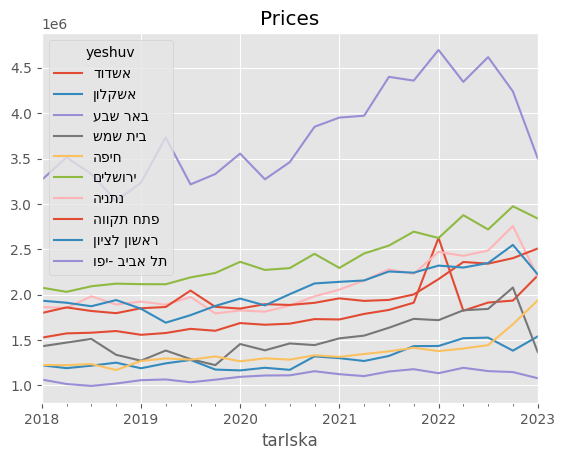

In [35]:
dff = df[cond_yeshuv_most & cond_full_sale].groupby(['yeshuv']).resample('Q', convention='end', closed="left")['mcirMozhar'].mean() # .T.pct_change().dropna()
dff.unstack().T.rename(columns=lambda x: x[::-1]).plot(title="Prices")

In [36]:
def apply_room(x):
    if x >= 6:
        return '+6'
    elif x <= 2.5:
        return '-2'
    else:
        return str(int(x))
df['misHadarim_m'] = df['misHadarim'].apply(apply_room)

<AxesSubplot: xlabel='tarIska'>

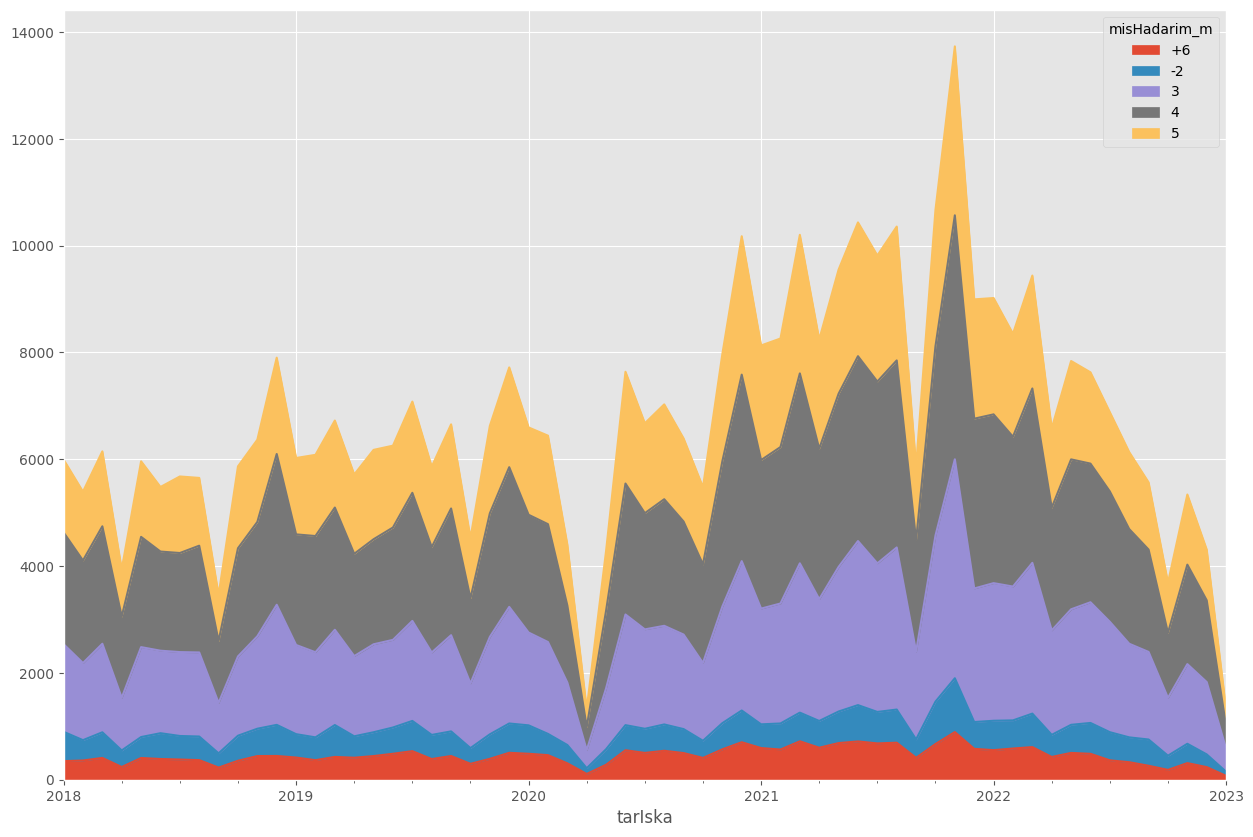

In [39]:
# plt.figure(figsize=(15,10))
df.resample('M')['misHadarim_m'].value_counts().unstack().plot(kind='area', stacked=True,figsize=(15,10))
# plt.show()

In [40]:
dff = df[cond_yeshuv_most].groupby(['yeshuv', 'misHadarim_m']).resample('M', convention='end', closed="left")['mcirMozhar'].agg(['mean', 'size', 'std']) # .mean() # .T.pct_change().dropna()

<Figure size 2000x1700 with 0 Axes>

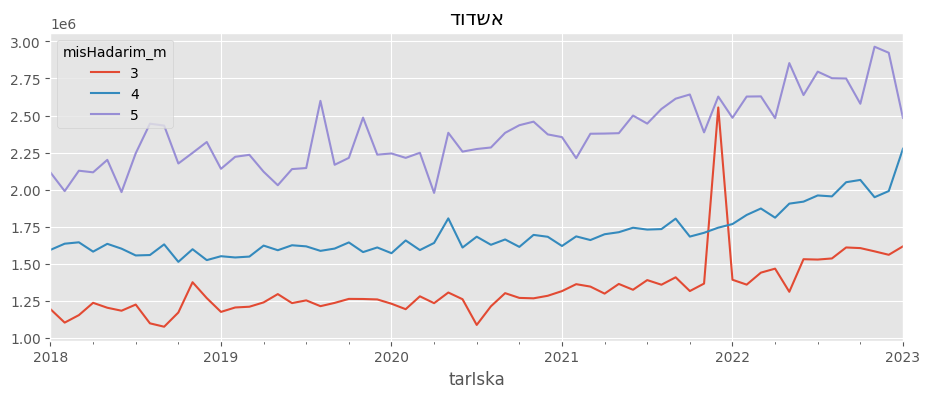

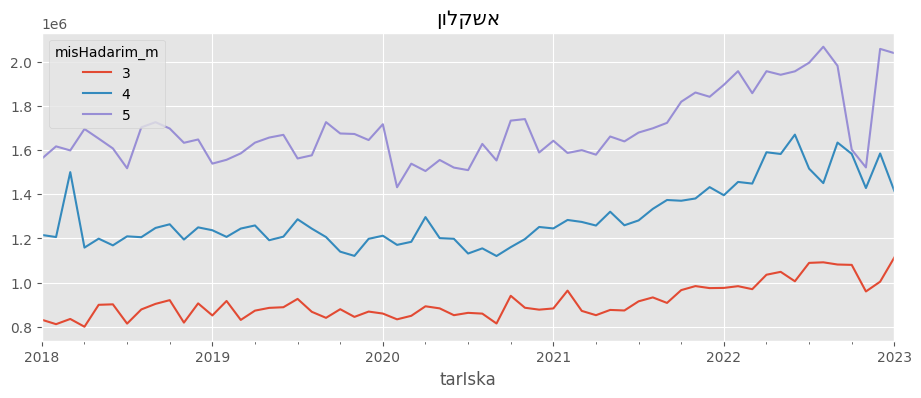

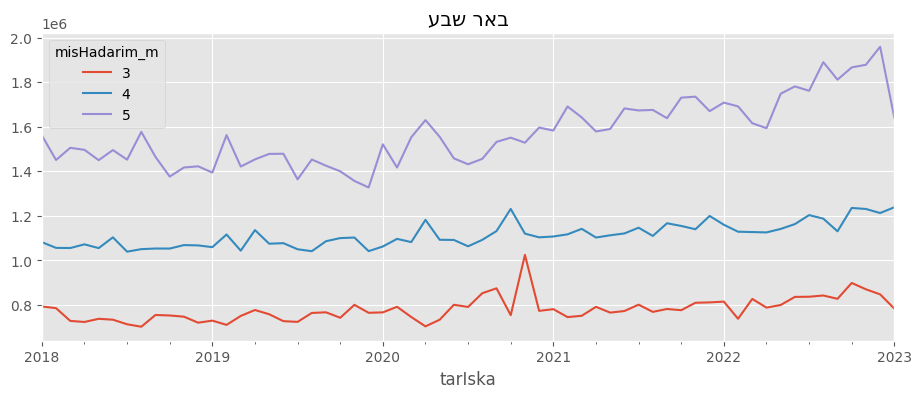

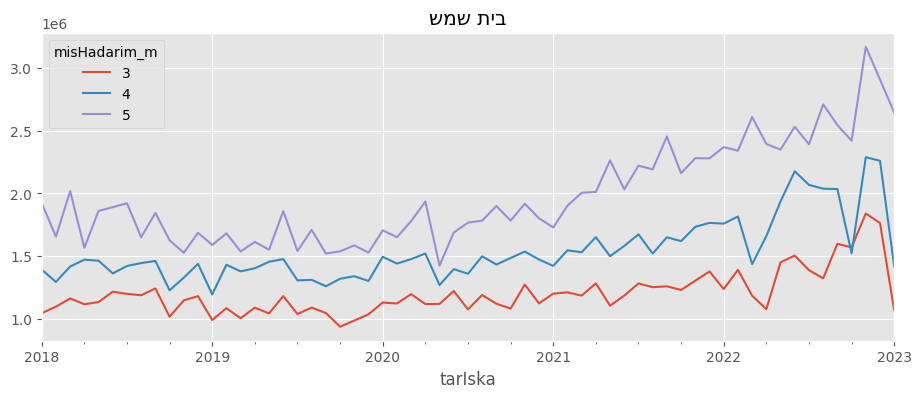

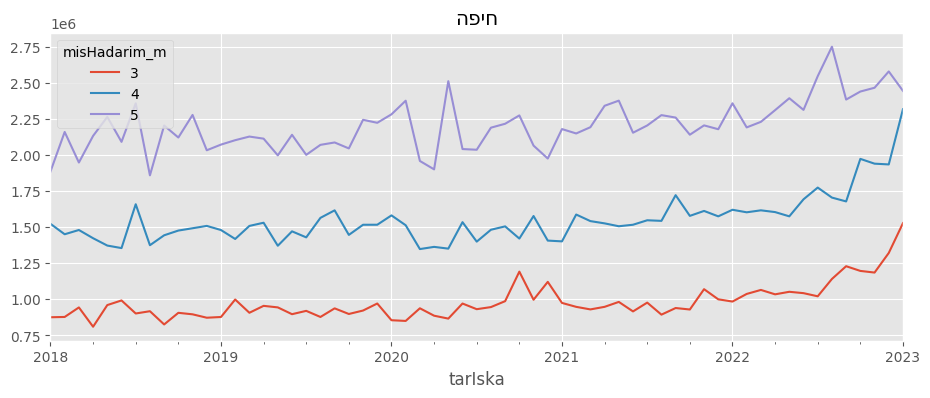

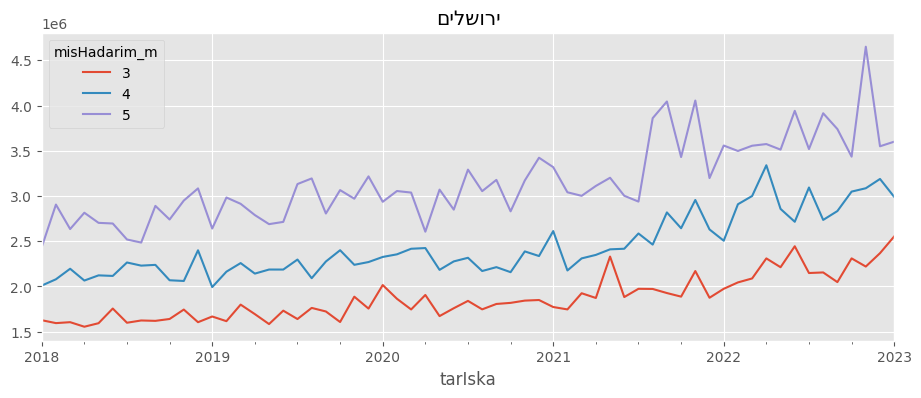

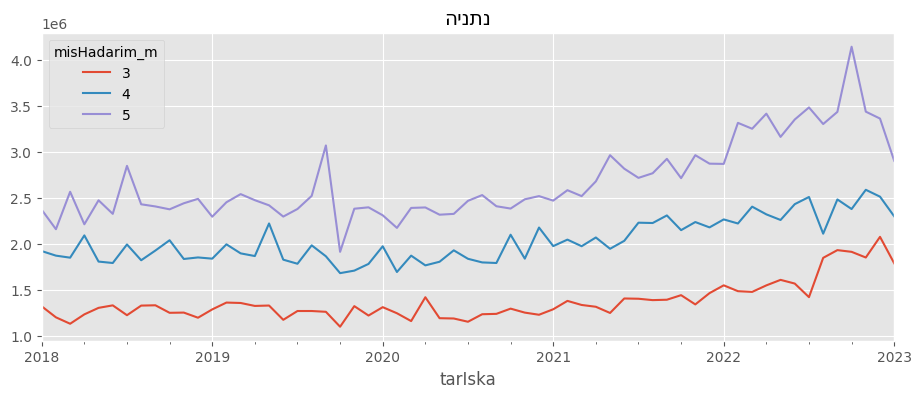

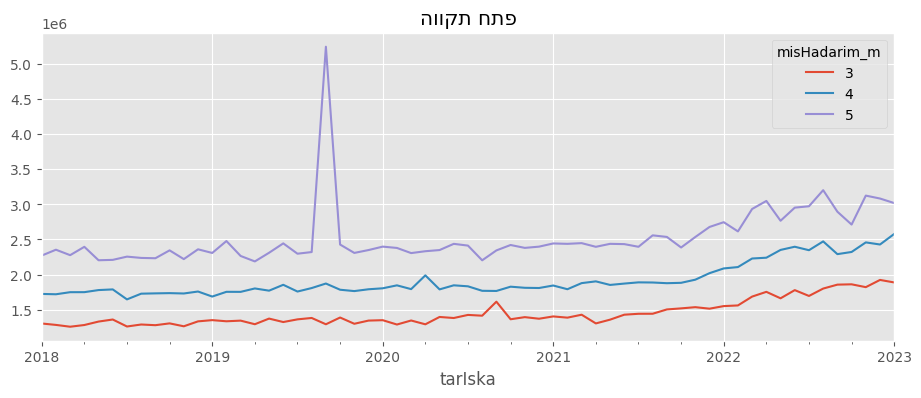

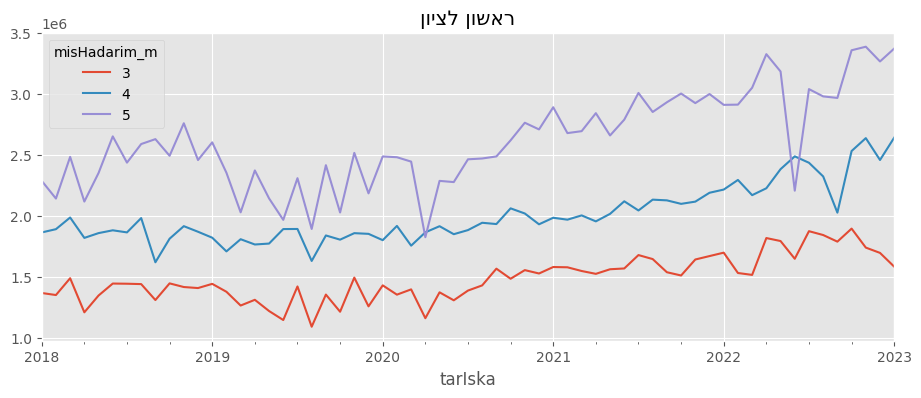

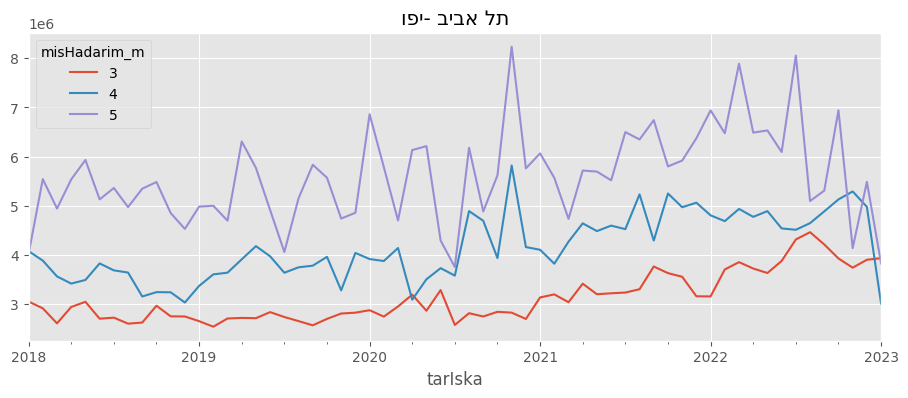

In [41]:
# Trying to plot area from 3 rooms to 5 rooms
colors = ['Red', 'Blue', 'Orange', 'Yellow', 'Green', 'Gray', 'Black', 'Lime']
plt.figure(figsize=(20,17))
for idx, tup in enumerate(dff.groupby(level=0)):
    row_id, data = tup
    color = colors[idx % len(colors)]
    pivot = data.reset_index().pivot(index='tarIska', columns='misHadarim_m', values='mean')
    pivot.drop(columns=['+6', '-2']).plot(kind='line', figsize=(11, 4), title=row_id[::-1])
#     pivot = data.reset_index().pivot(index='tarIska', columns='misHadarim_m', values=['mean', 'std']).drop(columns=[('mean', '+6'),
#                                                                                                        ('mean', '+6'),
#                                                                                                        ('mean', '-2'),
#                                                                                                        ('mean', '-2'),])
#     plt.errorbar(trip.index, trip['gas'], yerr=trip['std'])


In [521]:
prices.reset_index()

NameError: name 'prices' is not defined

In [ ]:
d

In [ ]:
cond = (df['mcirMozhar'] > 100000) & (df['shetachNeto'] > 20)

In [ ]:
df['avg_per_m_net'] = df['mcirMozhar'] / df['shetachNeto']

In [ ]:
df['shetachNeto'].value_counts().sort_index()

In [ ]:
df['avg_per_m_net'].max()

In [ ]:
df

<AxesSubplot: xlabel='tarIska'>

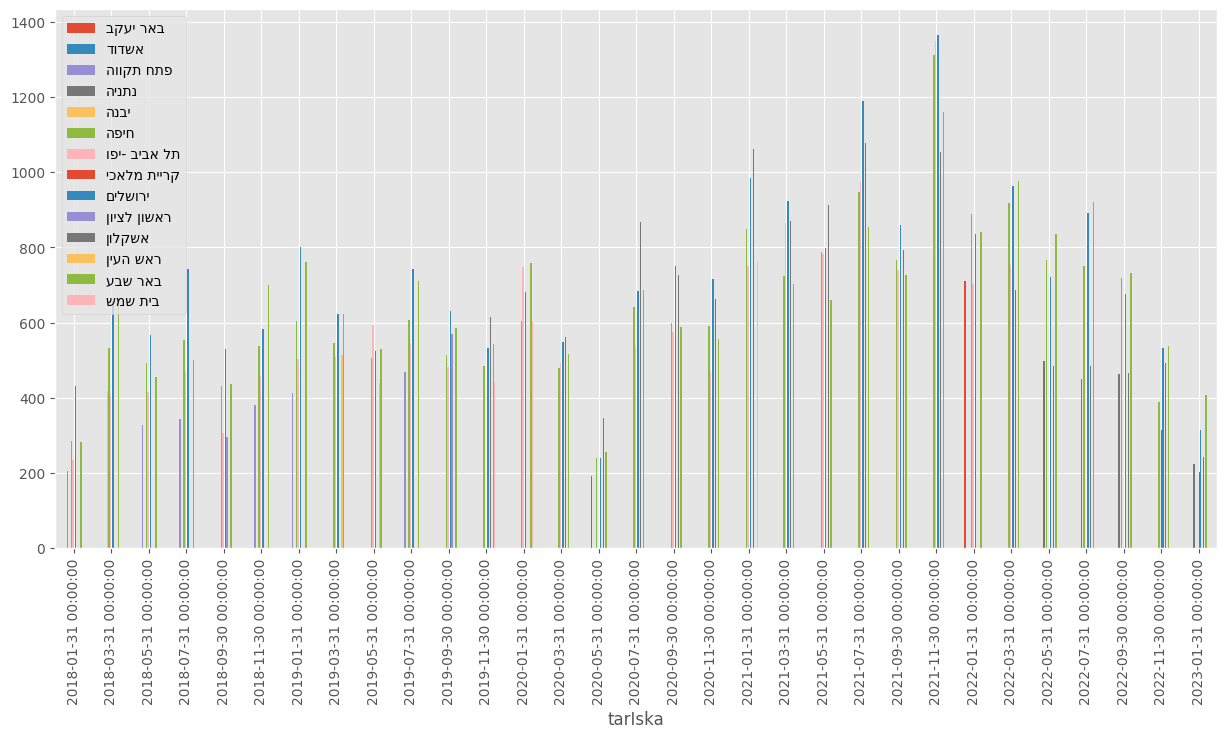

In [42]:
df.resample('2M')['yeshuv']\
.apply(lambda x: x.apply(lambda x: x[::-1]).value_counts().head(5)).unstack().plot(kind='bar', stacked=False, figsize=(15,7))

In [43]:
df['yeshuv'].value_counts()[:15]

ירושלים               22051
באר שבע               20258
חיפה                  19212
אשקלון                16963
תל אביב -יפו          16539
נתניה                 12596
פתח תקווה             12449
ראשון לציון           12091
אשדוד                 11920
בית שמש               11064
רמת גן                 9539
בת ים                  7597
חולון                  7537
מודיעין-מכבים-רעות     7073
חדרה                   7020
Name: yeshuv, dtype: int64

In [44]:
cond_room_range = (df['misHadarim'] >= 3) & (df['misHadarim'] <= 5)
center_cities = ['הרצלייה', 'בת ים', "רמת גן", "ראשון לציון", "חולון", "תל אביב - יפו", "רמת השרון"]
cond_city = (df['yeshuv'].isin(["באר שבע"]))
cond_location = (df['yeshuv'].isin(center_cities))

<AxesSubplot: xlabel='tarIska'>

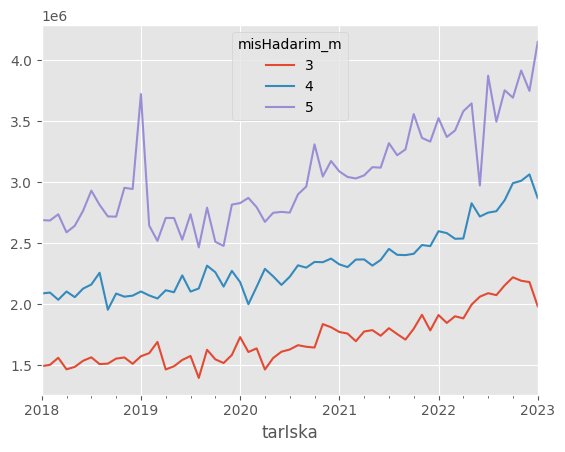

In [45]:
df[cond_room_range& cond_location][['misHadarim_m', 'mcirMozhar']].groupby('misHadarim_m')\
.resample('M')['mcirMozhar'].mean().unstack().T.ffill().plot(kind="line", stacked=False)  #  & cond_location

In [46]:
df[cond & cond_room_range & cond_city]

NameError: name 'cond' is not defined

17658


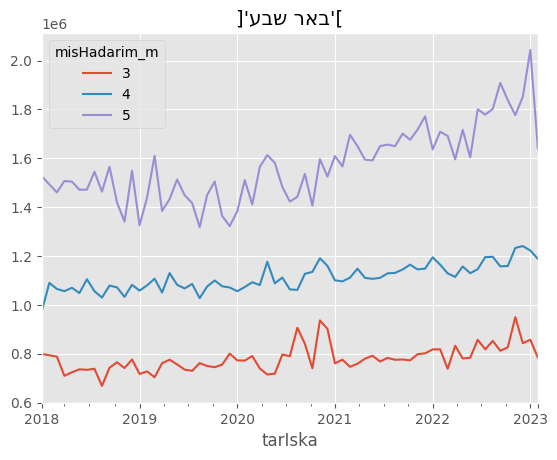

In [47]:
def plot_prices_over_time(df, conditions):
    df_s = df[conditions]
    print(len(df_s))
    # print(df_s.head())
    cities = str(df_s['yeshuv'].unique()[:5])[::-1]
#     df_s = df_s[['misHadarim_m', 'mcirMozhar']]
    df_s.groupby('misHadarim_m').resample('4W')['mcirMozhar'].mean().unstack().T.ffill().plot(kind="line", stacked=False, title=cities) # .plot()
plot_prices_over_time(df, cond_room_range & (df['yeshuv'] == "באר שבע"))

In [51]:
df[cond & cond_room_range][['misHadarim_m', 'avg_per_m_net']].groupby('misHadarim_m').resample('4W')['avg_per_m_net'].mean() # .unstack().T.plot(kind='line', stacked=False, figsize=(20,10), title="Change in price per meter (neto)") # .resample('1W').mean() # .apply() # ['misHadarim_m'].value_counts()

SyntaxError: unmatched ']' (1675467783.py, line 1)

In [49]:
df.columns

Index(['ezor', 'gush', 'yeshuv', 'rechov', 'bayit', 'knisa', 'dira',
       'mcirMozhar', 'mcirMorach', 'shetachBruto', 'shetachNeto', 'shnatBniya',
       'misHadarim', 'lblKoma', 'misKomot', 'dirotBnyn', 'hanaya', 'malit',
       'sugIska', 'tifkudBnyn', 'tifkudYchida', 'shumaHalakim', 'mofaGush',
       'tava', 'mahutZchut', 'helekNimkar', 'corX', 'corY', 'insertionDate',
       'year_sold_built_diff', 'newOrUsed', 'misHadarim_m'],
      dtype='object')

In [580]:
cond_yad_2 = (df['shnatBniya'] <=2020)

In [581]:
df[cond_yad_2]

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,mofaGush,tava,mahutZchut,helekNimkar,corX,corY,insertionDate,year_sold_built_diff,newOrUsed,misHadarim_m
tarIska,,,,,,,,,,,,,,,,,,,,,
2022-12-14,90 - מק-באר שבע,038089-0101-037-00,באר שבע,התלמוד,60,--,9,520000,520000,71,...,2,0,בעלות,1.00,179527,575374,2022-12-18 01:47:28.892752,62,used,3
2022-12-14,30 - מק-ירושלים,030695-0022-081-00,ירושלים,פרימו לוי,1,--,10,2500000,2500000,68,...,0,0,בעלות,1.00,221360,628727,2022-12-18 01:47:28.892752,13,used,3
2022-12-14,50 - מק-תל אביב,007151-0238-007-00,בת ים,ההגנה,32,--,0,1985000,1985000,90,...,1,0,בעלות,1.00,176834,658905,2022-12-18 01:47:28.892752,6,used,3
2022-12-14,65 - מק-חדרה,010570-0048-004-00,חדרה,שיבת ציון,43,--,0,3030000,3030000,148,...,1,0,בעלות,1.00,189047,704898,2022-12-18 01:47:28.892752,72,used,5
2022-12-14,84 - מק-רחובות,002071-0139-000-00,אשדוד,יהודה הלוי,22,--,41,2500000,2500000,146,...,31,0,חכירה מאחר,1.00,166876,633662,2022-12-18 01:47:28.892752,11,used,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,84 - מק-רחובות,004041-0203-000-00,באר יעקב,שבו,1,--,2,2050803,2050803,116,...,25,--,בעלות,1.00,183835,649202,2023-01-16 23:45:34.482607,0,new,5
2018-12-31,84 - מק-רחובות,003512-0173-017-00,יבנה,הדרור,11,--,17,1450000,1450000,105,...,7,--,בעלות,1.00,175761,642286,2023-01-16 23:45:34.482607,0,new,5
2018-12-31,84 - מק-רחובות,003697-0513-000-00,רחובות,אלתרמן נתן,6,--,36,2410001,2410001,142,...,25,--,בעלות,1.00,182130,643288,2023-01-16 23:45:34.482607,1,used,5


In [582]:
df['shnatBniya'].value_counts().sort_index()[-30:]

/var/folders/gm/ry_d6f0138g91qlw7ngrf2400000gn/T/ipykernel_26925/2612535166.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['shnatBniya'].value_counts().sort_index()[-30:]


2004     2953
2005     3431
2006     2646
2007     2785
2008     3299
2009     3146
2010     5247
2011     3374
2012     4663
2013     5533
2014     5984
2015     7909
2016     8906
2017    15372
2018    27964
2019    33957
2020    29728
2021    27570
2022    19448
2023     6566
2024     4026
2025     2765
2026      322
2027      253
2028       87
2029        2
2030       12
2031       13
2032        1
2033        2
Name: shnatBniya, dtype: int64

In [583]:
df['gush']

tarIska
2022-12-14    038089-0101-037-00
2022-12-14    006386-0170-032-00
2022-12-14    030695-0022-081-00
2022-12-14    007151-0238-007-00
2022-12-14    010570-0048-004-00
                     ...        
2018-12-31    004041-0203-000-00
2018-12-31    003512-0173-017-00
2018-12-31    003697-0513-000-00
2018-12-31    014719-0072-000-00
2018-12-31    003735-0055-000-00
Name: gush, Length: 411418, dtype: object

In [584]:
df['tifkudYchida'].unique()

array(['דירה בבית קומות', 'מחברה לפרטי', 'מחברה לחברה', 'דירת גן',
       'קוטג דו-משפחתי', 'קוטג חד-משפחתי', 'דירת דופלקס',
       'דירת גג )פנטהאוז(', 'בית בודד', 'קוטג טורי', 'דירה במלון דירות',
       'מפרטי לפרטי', 'מפרטי לחברה', 'בבנין מעורב מגורים'], dtype=object)

In [585]:
df['mahutZchut'].unique()

array(['בעלות', 'חכירה מאחר', 'חכירה ממינהל', 'בעלות כפופה לחכירה', '--',
       'חכירה ממינהל 49 שנים', 'בעלות בנכס מוגן', 'הרשאה לשימוש בנכס',
       'חכירה ממינהל 1 שנה', 'חכירה ממינהל 25 שנים',
       'חכירה ממינהל 98 שנים', 'חכירה ממינהל 99 שנים',
       'חכירה מאחר 49 שנים', 'חכירה ממינהל 5 שנים', 'חכירה ממינהל 3 שנים',
       'חכירה ממינהל 6 שנים', 'חכירה מאחר 99 שנים',
       'חכירה ממינהל 19 שנים', 'חכירה ממינהל 2 שנים', 'חכירה מאחר 1 שנה',
       'חכירה ממינהל 47 שנים', 'חכירה ממינהל 9 שנים',
       'חכירה מאחר 98 שנים', 'חכירה ממינהל 55 שנים',
       'חכירה ממינהל 50 שנים', 'חכירה ממינהל 48 שנים',
       'חכירה ממינהל 80 שנים', 'חכירה מאחר 80 שנים',
       'חכירה ממינהל 31 שנים', 'חכירה מאחר 3 שנים',
       'חכירה ממינהל 59 שנים', 'חכירה ממינהל 11 שנים',
       'חכירה ממינהל 79 שנים', 'חכירה ממינהל 10 שנים',
       'חכירה ממינהל 39 שנים', 'חכירה מאחר 25 שנים', 'חכירה מאחר 4 שנים',
       'חכירה ממינהל 89 שנים', 'חכירה ממינהל 56 שנים',
       'חכירה ממינהל 69 שנים', 'חכירה ממ

In [586]:
df_g[df_g['size'] > 8]

mean        std  size
yeshuv    misHadarim shnatBniya                              
אבן יהודה 2.00       1999         417,236.56  91,542.91     9
אבני חפץ  3.00       1990         548,750.00 208,863.99    16
                     2018         777,333.33 133,384.87    15
          4.00       2018         788,411.76  49,683.76    17
                     2019         823,133.40  73,605.83    15
...                                      ...        ...   ...
תל מונד   5.00       2021       3,158,352.25 349,774.74    28
          6.00       2017       2,815,449.80 467,308.61    20
                     2018       2,823,031.88 354,073.51    25
                     2020       3,020,043.02 411,686.15    44
          6.50       2018       2,726,232.22  40,410.12     9

[6623 rows x 3 columns]

In [587]:
df['tarIska'] = pd.to_datetime(df['tarIska'], format='%Y%m%d')
df.resample('2w').size().plot()

KeyError: 'tarIska'

In [588]:
df.index.min()

Timestamp('2018-01-01 00:00:00')

<AxesSubplot: xlabel='tarIska'>

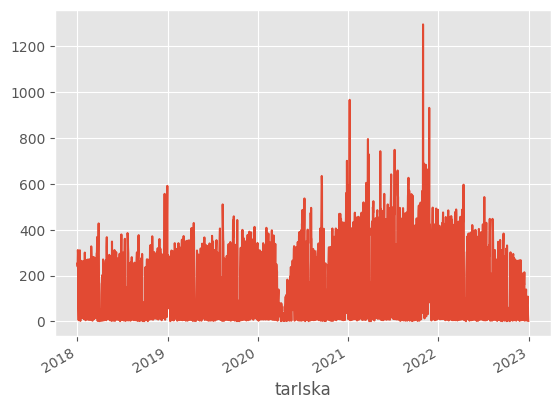

In [589]:
df.groupby('tarIska').size().plot()

In [590]:
central_cities = ['רמת גן', 
                 'ראשון לציון',
                 'תל אביב -יפו',
                 'גבעתיים',
                 'בת ים',
                 'חולון',
                 'רמת השרון',
                 'הרצלייה',]

<AxesSubplot: xlabel='tarIska'>

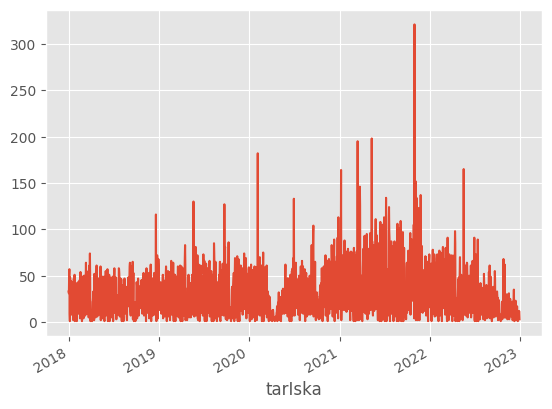

In [591]:
df[df['yeshuv'].isin(central_cities)].groupby('tarIska').size().plot()

In [592]:
df['yeshuv'].unique()

array(['באר שבע', 'פתח תקווה', 'ירושלים', 'בת ים', 'חדרה', 'אשדוד',
       'חולון', 'חיפה', 'גבעתיים', 'אשקלון', 'באר יעקב', 'רעננה',
       'כרמיאל', 'שדרות', 'נתניה', 'כפר יונה', 'הוד השרון', 'עכו',
       'רמת גן', 'ראשון לציון', 'בני ברק', 'כפר סבא', 'קריית ביאליק',
       'רמלה', 'אריאל', 'טבריה', 'נתיבות', 'קריית גת', 'אור יהודה',
       'טירת כרמל', 'תל אביב -יפו', 'דימונה', 'ערד', 'אילת', 'בית שאן',
       'לוד', 'קריית שמונה', 'חריש', 'עפולה', 'קריית ים', 'נהרייה',
       'יבנה', 'קריית מוצקין', 'קריית אונו', 'קריית אתא', 'רמת ישי',
       'רמת השרון', 'גבעת זאב', 'כפר אדומים', 'ראש העין', 'זכרון יעקב',
       'מגדל העמק', 'מרום גולן', 'אור עקיבא', 'פרדס חנה-כרכור',
       'חצור הגלילית', 'נצרת', 'בית שמש', 'מעלות-תרשיחא', 'נס ציונה',
       'מצפה רמון', 'עמנואל', 'מזכרת בתיה', 'דפנה', 'אזור', 'קריית מלאכי',
       'נוף הגליל', 'הרצלייה', 'צפת', 'אלעד', 'אופקים', 'רחובות', 'נשר',
       'בת חפר', 'גדרה', 'מודיעין-מכבים-רעות', 'יקנעם עילית', 'אלפי מנשה',
       'גני תקווה', 'גב

In [593]:
df.groupby('tarIska').size()

tarIska
2018-01-01    252
2018-01-02    239
2018-01-03    311
2018-01-04    289
2018-01-05     62
             ... 
2022-12-27     78
2022-12-28    101
2022-12-29    108
2022-12-30     29
2022-12-31      2
Length: 1818, dtype: int64

In [594]:
import folium

In [595]:
from pyproj import Transformer
trans_itm_to_wgs84 = Transformer.from_crs(2039, 4326)

In [634]:
df_s = df.sample(50)

In [839]:
color_rooms = {'-2': 'gray', '3': 'green', '4': 'cadetblue', '5': 'darkpurple', '+6': 'red'}

In [840]:
def get_map(df_s, deal=None):
    def create_marker(dt, row, color=None, change_cords=None):
        price_mr_net = row['mcirMozhar'] / row['shetachNeto'] if row['shetachNeto'] > 0 else -1
        price_mr_bruto = row['mcirMozhar'] / row['shetachBruto']  if row['shetachBruto'] > 0 else -1
        tooltip = f"{row['gush']}<br>{dt.date()}<br>{row['yeshuv']}, {row['rechov']}, {row['bayit']}<br>{row['shnatBniya']} {row['misHadarim_m']} חדרים<br>{row['mcirMozhar']:0,.0f}, {price_mr_net:0,.0f}"
    #     print(row['misHadarim'])
        color = color if color else color_rooms[row['misHadarim_m']]
        if change_cords:
            cords = [*trans_itm_to_wgs84.transform(row['corX'] + 10, row['corY'] + 10)]
        else:
            cords = [*trans_itm_to_wgs84.transform(row['corX'], row['corY'])]
        return folium.Marker(cords,
                      popup="<i>Mt. Hood Meadows</i>",
                      tooltip=tooltip,
                      # https://fontawesome.com/icons?d=gallery
                      icon=folium.Icon(color=color,
                                       icon="fa-light fa-house", prefix='fa')
                     )
        
    if deal is not None:
        m = folium.Map(location=[*trans_itm_to_wgs84.transform(deal['corX'], deal['corY'])], zoom_start=16)
        create_marker(deal.name, deal, color='pink', change_cords=True).add_to(m)
    else:
        m = folium.Map(location=[*trans_itm_to_wgs84.transform(185118, 666233)], zoom_start=8)
    for idx, row in df_s.iterrows():
        if row['corX'] == 0 and row['corY'] == 0:
            continue
        create_marker(idx, row).add_to(m)
    return m

In [841]:
get_map(df_s)

In [682]:
# https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data/notebook

In [ ]:
from folium.plugins import HeatMap
m = folium.Map(location=[*trans_itm_to_wgs84.transform(185118, 666233)], zoom_start=8)
# Filter the DF for rows, then columns, then remove NaNs
# heat_df = df_acc[df_acc['Speed_limit']=='40'] # Reducing data size so it runs faster
# heat_df = df_acc[df_acc['Year']=='2007'] # Reducing data size so it runs faster
# heat_df = heat_df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[*trans_itm_to_wgs84.transform(row['corX'], row['corY'])] for index, row in df.iterrows()]
heat_data
# Plot it on the map
HeatMap(heat_data).add_to(m)
m

In [ ]:
from folium.plugins import HeatMapWithTime
# Create weight column, using date
# heat_df['Weight'] = df_acc['Date'].str[3:5]
# heat_df['Weight'] = heat_df['Weight'].astype(float)
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])

head_data = []
timestamps = []
for g_name, df_g in df.resample('M'):
#     print([[*trans_itm_to_wgs84.transform(row['corX'], row['corY'])] for index, row in df_g.iterrows()])
    points = [[*trans_itm_to_wgs84.transform(row['corX'], row['corY']), 0.1] for index, row in df_g.iterrows()]
    head_data.append(points)
    timestamps.append(str(pd.to_datetime(g_name, format='%Y%m%d').date()))
#     print(df_g)
#     break

# [[*trans_itm_to_wgs84.transform(row['corX'], row['corY'])] for index, row in df.iterrows()]
# List comprehension to make out list of lists
# heat_data = [[[row['Latitude'],row['Longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,13)]



In [ ]:
len(head_data)

In [ ]:
# Plot it on the map
m = folium.Map(location=[*trans_itm_to_wgs84.transform(185118, 666233)], zoom_start=8)
hm = HeatMapWithTime(head_data, index=timestamps, auto_play=True, scale_radius=False)
# hm = HeatMapWithTime(head_data[:5], index=timestamps[:5], scale_radius=False, radius=4, blur=0.3, auto_play=True,max_opacity=0.8, min_speed=1)
hm.add_to(m)
m

In [ ]:
len(timestamps)

In [ ]:
df.groupby(['ezor', 'misHadarim'])['mcirMozhar'].mean() # mcirMozhar'] / row['shetachNeto'] if row['shetachNeto

In [ ]:
import matplotlib.pyplot as plt
for name, df_g in df.groupby('ezor'):
    df_g.groupby('misHadarim')['mcirMozhar'].mean().plot.bar(title=name[::-1])
    plt.ylim([500000, 8000000])
    plt.xlim([1.5, 6.5])
    plt.grid(axis='y')
    plt.show()
# , 'misHadarim']['mcirMozhar'].mean():

In [ ]:
df_g.groupby('misHadarim')['mcirMozhar'].mean()

In [ ]:
# filter cities with low number of deals over 4 years...
ser = df.groupby('yeshuv').filter(lambda x: len(x) > 5000).groupby('yeshuv').resample('M').size().T # .to_frame().query('"0" > 0') # .pct_change().groupby(level=1).max() # .to_frame() # rolling(3).mean().to_frame()
ser = ser.pct_change(axis=0).dropna()
# max_cities_per_period = ser.idxmax(axis=1)
display(ser.tail(3).style.background_gradient(axis=0))
# Find highest increase in sells city in the period, decrease in sells
stats = ser.apply(lambda row: (row.idxmax(), row.loc[row.idxmax()], row.idxmin(), row.loc[row.idxmin()]),axis=1)
pd.DataFrame(stats.tolist(), index=stats.index).tail(3)

In [ ]:
max_cities_per_period

In [ ]:
ser

In [ ]:
ser.at[ser.idxmax(axis=1)]

In [ ]:
ser.loc[max_cities].to_frame().reset_index().set_index('tarIska')

In [ ]:
x = ser.to_frame().reset_index() # .index

In [ ]:
x[x['yeshuv'] == 'אבן יהודה']

In [ ]:
xxx =df.resample('M')['yeshuv'].value_counts().groupby(level=0).nlargest(1)

In [ ]:
xxx

In [ ]:
df[df['shetachNeto'] < 300]['shetachNeto'].hist(bins=100)

In [ ]:
df[df['shetachBruto'] < 300]['shetachBruto'].hist(bins=100)

In [ ]:
df['helekNimkar']

In [330]:
deal = df.sample(1).squeeze()

In [331]:
deal.name

Timestamp('2021-03-10 00:00:00')

In [332]:
deal.index

Index(['ezor', 'gush', 'yeshuv', 'rechov', 'bayit', 'knisa', 'dira',
       'mcirMozhar', 'mcirMorach', 'shetachBruto', 'shetachNeto', 'shnatBniya',
       'misHadarim', 'lblKoma', 'misKomot', 'dirotBnyn', 'hanaya', 'malit',
       'sugIska', 'tifkudBnyn', 'tifkudYchida', 'shumaHalakim', 'mofaGush',
       'tava', 'mahutZchut', 'helekNimkar', 'corX', 'corY', 'insertionDate'],
      dtype='object')

In [923]:
def find_closest_deals(df, deal, distance, timeback):
    if deal['corX'] == 0 or deal['corY'] == 0:
        return []
    past_deals = df[(df.index >= deal.name - pd.to_timedelta(f'{30* timeback}D')) & (df.index < deal.name)].copy()
    dist = (((past_deals['corX'] - deal['corX'])**2 + (past_deals['corY'] - deal['corY'])**2)**(1/2)) / 1000
    past_deals['dist'] = dist
    past_deals = past_deals[past_deals['dist'] < distance]
#     past_deals = past_deals[(past_deals.index != deal.name) & (past_deals['gush'] != deal.gush)]
    return past_deals

In [1015]:
deal = df.sample(1).squeeze()
display(deal[:12])

ezor               50 - מק-תל אביב
gush            007104-0289-027-00
yeshuv                תל אביב -יפו
rechov                   החשמונאים
bayit                           10
knisa                           --
dira                            27
mcirMozhar                 2200000
mcirMorach                 2200000
shetachBruto                    50
shetachNeto                     50
shnatBniya                    2020
Name: 2020-08-13 00:00:00, dtype: object

In [1016]:
past_deals_around = find_closest_deals(df, deal, 0.3, 3)
len(past_deals_around)

35

In [1017]:
cols = ['gush', 'yeshuv', 'rechov', 'bayit', 'dira', 'mcirMozhar', 'shetachBruto', 'shetachNeto', 'corX', 'corY', 'misHadarim_m', 'shnatBniya', 'newOrUsed']

In [1018]:
past_deals_around = past_deals_around[cols]

In [1019]:
# anaylize deals around comapred to this
# price per meter: burto / net
price_per_net = (past_deals_around['mcirMozhar'] / past_deals_around['shetachNeto']).rename('net')
price_per_gross = (past_deals_around['mcirMozhar'] / past_deals_around['shetachBruto']).rename('gross')

In [1020]:
past_deals_around = pd.concat([past_deals_around, price_per_net, price_per_gross], axis=1)

In [1021]:
def drop_outliers(df, cols):
    cnt_1 = len(df)
    df_sub = df[cols]
    # OPTION 3: iqr filter: within 2.22 IQR (equiv. to z-score < 3)
    iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
    lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22
    df[cols] = df_sub.where(lim, np.nan) # replace outliers with nan
    df = df.dropna()
    cnt_2 = len(df)
    if cnt_1 != cnt_2:
        print('dropped', cnt_1 - cnt_2)
    return df.dropna()
past_deals_around = drop_outliers(past_deals_around, ['net', 'gross'])
# price_per_net = drop_outliers(price_per_net)

dropped 5


In [1022]:
def plot_hist_room_net(past_deals_around, deal):
    # pd.concat([price_per_gross, price_per_net], axis=1).hist(figsize=(6,3), bins=15)
    # price_per_net.hist(figsize=(6,3))
    past_deals_around.groupby('misHadarim_m')['net'].hist(bins = len(past_deals_around), figsize=(6,3), alpha=0.8, legend=True)
    deal_price_per_net = deal['mcirMozhar'] / deal['shetachNeto']
    plt.axvline(deal_price_per_net, c='blue', lw=3)
    _=plt.title(f'Based on {len(past_deals_around)} deals, deal price per net: {deal_price_per_net:0.0f}, rooms:{deal["misHadarim"]}')
def plot_hist_room_gross(past_deals_around, deal):
    # pd.concat([price_per_gross, price_per_net], axis=1).hist(figsize=(6,3), bins=15)
    # price_per_net.hist(figsize=(6,3))
    past_deals_around.groupby('misHadarim_m')['gross'].hist(bins = len(past_deals_around), figsize=(6,3), alpha=0.8, legend=True)
    deal_price_per_net = deal['mcirMozhar'] / deal['shetachBruto']
    plt.axvline(deal_price_per_net, c='blue', lw=3)
    _=plt.title(f'Based on {len(past_deals_around)} deals, deal price per gross: {deal_price_per_net:0.0f}, rooms:{deal["misHadarim"]}')

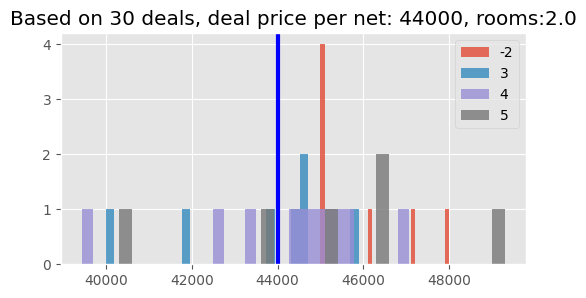

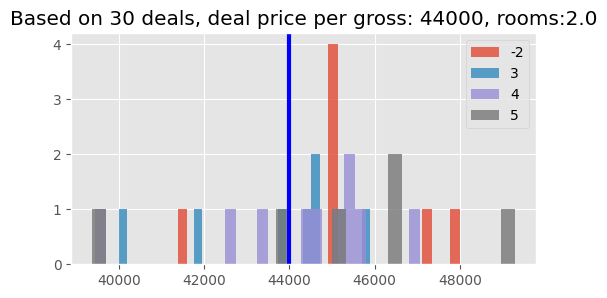

In [1023]:
plot_hist_room_net(past_deals_around, deal)
plt.show()
plot_hist_room_gross(past_deals_around, deal)

In [1024]:
get_map(past_deals_around, deal)

In [664]:
# price_per_net

In [386]:
# past_deals_around.head(30)

In [116]:
price_per_net.mean(), price_per_net.std(), price_per_gross.mean(), price_per_gross.std()

(18526.154718284906,
 3737.9177201033563,
 18526.154718284906,
 3737.9177201033563)

In [104]:
past_deals_around[(past_deals_around.index != deal.name) & (past_deals_around['gush'] != deal.gush)]

,ezor,gush,yeshuv,rechov,bayit,knisa,dira,mcirMozhar,mcirMorach,shetachBruto,...,tifkudYchida,shumaHalakim,mofaGush,tava,mahutZchut,helekNimkar,corX,corY,insertionDate,dist
tarIska,,,,,,,,,,,,,,,,,,,,,
2021-06-01,29 - מק-מרכז,005611-0039-004-00,ראש העין,ראש העין,23,--,28,1735000,1735000,112,...,דירה בבית קומות,1 / 1 ליחידה בשלמותה,0,--,בעלות כפופה לחכירה,1.00,198230,665562,2023-01-03 05:15:42.352509,0.00


In [ ]:
df.columns

In [ ]:
pd.options.display.float_format = None # '{:,.0f}'.format

In [ ]:
df[['mcirMozhar', 'misHadarim']].corr()

In [ ]:
df['shetachNeto'] / df['shetachNeto']

In [ ]:
pd.qcut(df['shetachBruto'],10, retbins=True)[0].value_counts().sort_index()

In [ ]:
df['shetachBruto'].value_counts().sort_index()[-60:]